In [1]:
import pickle
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

## Data loading and processing
the target variable “flow” in cubic meters per second at a single location 
the predictor precipitation “obs_pr” in mm at 9 surrounding locations 
the predictor temperature “obs_tas” in Celsius at 9 surrounding locations.

In [2]:
path = '/home/germanm2/climateAI_assignment/uke_eggedal_data_challenge.pkl'

with open(path, 'rb') as f:
    data_dict = pickle.load(f)

In [3]:
data_dict.keys()

dict_keys(['flow', 'obs_tas', 'flow_dates', 'obs_lon_lat', 'obs_pr', 'obs_dates'])

In [4]:
length_dict = {key: len(value) for key, value in data_dict.items()}
length_dict

{'flow': 21542,
 'obs_tas': 21546,
 'flow_dates': 21542,
 'obs_lon_lat': 2,
 'obs_pr': 21546,
 'obs_dates': 21546}

We have to predict “flow” for the next day. For that we need to shift the obs_dates one day

In [5]:
#Process the x data
x_df1 = pd.DataFrame(data=data_dict['obs_tas'], columns=["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]).reset_index(drop=True)
x_df2 = pd.DataFrame(data=data_dict['obs_pr'], columns=["P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9"]).reset_index(drop=True)
x_df3 = pd.DataFrame(data=data_dict['obs_dates'], columns=["obs_dates"]).reset_index(drop=True)
x_data_df = pd.concat([x_df1, x_df2, x_df3], axis=1)
# x_data_df['obs_dates'] = x_data_df['obs_dates'] + np.timedelta64(1,'D')
# x_data_df

In [6]:
# Process the y data
y_df1 = pd.DataFrame(data=data_dict['flow'], columns=["flow"]).reset_index(drop=True)
y_df2 = pd.DataFrame(data=data_dict['flow_dates'], columns=["flow_dates"]).reset_index(drop=True)
y_data_df = pd.concat([y_df1, y_df2], axis=1)
y_data_df

,flow,flow_dates
0,1.723781,1958-01-04
1,0.960882,1958-01-05
2,0.001000,1958-01-06
3,0.001000,1958-01-07
4,0.316796,1958-01-08
...,...,...
21537,4.843290,2016-12-22
21538,3.756970,2016-12-23
21539,3.556818,2016-12-24
21540,3.402133,2016-12-25


In [7]:
#Merge it in one dataframe
data_df = pd.merge(x_data_df, y_data_df, left_on='obs_dates', right_on='flow_dates')
data_df

,T1,T2,T3,T4,T5,T6,T7,T8,T9,P1,...,P3,P4,P5,P6,P7,P8,P9,obs_dates,flow,flow_dates
0,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,-12.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958-01-04,1.723781,1958-01-04
1,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,-8.3,2.0,...,3.0,3.3,3.7,0.7,3.1,4.2,1.1,1958-01-05,0.960882,1958-01-05
2,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,-5.8,12.7,...,16.5,12.5,11.2,12.2,14.1,14.2,10.5,1958-01-06,0.001000,1958-01-06
3,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,-7.4,6.6,...,9.6,7.3,6.5,5.2,10.4,5.7,3.7,1958-01-07,0.001000,1958-01-07
4,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,-14.9,3.4,...,2.7,3.5,3.8,3.3,2.9,4.0,3.5,1958-01-08,0.316796,1958-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,-7.5,2.2,...,1.1,1.5,0.1,0.0,0.0,0.0,0.0,2015-12-27,2.177040,2015-12-27
21174,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,-7.5,5.5,...,8.3,6.1,3.7,5.0,5.4,0.0,5.1,2015-12-28,4.876250,2015-12-28
21175,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,-6.3,1.8,...,2.1,2.7,0.2,0.8,2.2,0.0,0.0,2015-12-29,4.998840,2015-12-29
21176,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,-3.0,4.1,...,4.6,5.1,3.5,3.4,3.2,0.0,3.6,2015-12-30,4.428777,2015-12-30


In [8]:
# Identify Anomalies/ Missing Data
data_df = data_df.dropna()
# Descriptive statistics for each column
data_df.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,P1,P2,P3,P4,P5,P6,P7,P8,P9,flow
count,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000,21178.000000
mean,-0.047006,0.714643,2.979516,1.489362,1.274884,2.313594,1.890589,2.839834,3.527821,1.991529,2.007583,2.076490,2.213070,2.265171,2.214652,2.305860,2.385376,2.255959,6.914146
std,8.261391,8.396938,9.050337,8.571648,8.467370,8.613825,8.575300,8.797301,8.959525,4.025939,4.347522,4.496716,4.560043,4.756833,4.908967,4.807279,5.424111,5.184413,9.665353
min,-33.799999,-32.599998,-33.299999,-33.700001,-32.799999,-32.200001,-33.200001,-32.599998,-30.799999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000031
25%,-5.800000,-5.200000,-3.100000,-4.400000,-4.600000,-3.700000,-4.000000,-3.200000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.156123
50%,0.200000,0.900000,3.400000,1.800000,1.500000,2.500000,2.200000,3.100000,3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.151342
75%,6.600000,7.600000,10.600000,8.500000,8.200000,9.500000,9.000000,10.200000,11.100000,2.500000,2.200000,2.200000,2.600000,2.600000,2.200000,2.600000,2.200000,2.000000,8.606681
max,20.299999,21.200001,23.400000,21.700001,21.700001,22.700001,21.799999,23.299999,24.000000,61.500000,60.700001,66.800003,64.000000,62.400002,61.299999,64.500000,67.699997,73.699997,85.397653


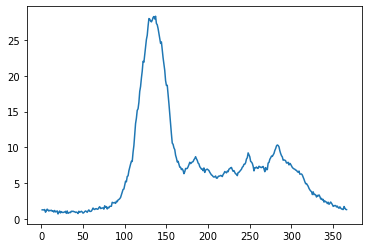

In [9]:
# Add the doy
data_df['doy'] = [x.timetuple().tm_yday for x in data_df['obs_dates']]
average_flow = data_df.groupby('doy')['flow'].mean()

#Plot the average flow along the year
plt.plot(average_flow.index ,average_flow)

In [10]:
data_df = pd.merge(data_df, average_flow, left_on='doy', right_index=True,suffixes= ('','_doy')).sort_values(by=['obs_dates'])

In [12]:
features= data_df.drop(['obs_dates', 'flow_dates', 'doy', 'flow_doy'], axis = 1)
features

,T1,T2,T3,T4,T5,T6,T7,T8,T9,P1,P2,P3,P4,P5,P6,P7,P8,P9,flow
0,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,-12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.723781
1,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,-8.3,2.0,2.2,3.0,3.3,3.7,0.7,3.1,4.2,1.1,0.960882
2,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,-5.8,12.7,11.0,16.5,12.5,11.2,12.2,14.1,14.2,10.5,0.001000
3,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,-7.4,6.6,6.9,9.6,7.3,6.5,5.2,10.4,5.7,3.7,0.001000
4,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,-14.9,3.4,3.6,2.7,3.5,3.8,3.3,2.9,4.0,3.5,0.316796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,-7.5,2.2,0.1,1.1,1.5,0.1,0.0,0.0,0.0,0.0,2.177040
21174,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,-7.5,5.5,4.9,8.3,6.1,3.7,5.0,5.4,0.0,5.1,4.876250
21175,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,-6.3,1.8,1.7,2.1,2.7,0.2,0.8,2.2,0.0,0.0,4.998840
21176,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,-3.0,4.1,3.5,4.6,5.1,3.5,3.4,3.2,0.0,3.6,4.428777


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [44]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [45]:
values = data_df.drop(['obs_dates', 'flow_dates', 'doy', 'flow_doy'], axis = 1).values
# integer encode direction
encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [46]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t)
1,0.388170,0.364312,0.358025,0.382671,0.372477,0.355191,0.385455,0.359571,0.326642,0.000000,...,0.032520,0.036244,0.044910,0.051562,0.059295,0.011419,0.048062,0.062038,0.014925,0.011251
2,0.480592,0.459108,0.439153,0.481949,0.467890,0.429872,0.485455,0.445438,0.410584,0.032520,...,0.206504,0.181219,0.247006,0.195312,0.179487,0.199021,0.218605,0.209749,0.142469,0.000011
3,0.421442,0.421933,0.472663,0.454874,0.436697,0.451730,0.460000,0.461538,0.456204,0.206504,...,0.107317,0.113674,0.143713,0.114063,0.104167,0.084829,0.161240,0.084195,0.050204,0.000011
4,0.380776,0.379182,0.447972,0.415162,0.394495,0.408015,0.420000,0.431127,0.427007,0.107317,...,0.055285,0.059308,0.040419,0.054688,0.060897,0.053834,0.044961,0.059084,0.047490,0.003709
5,0.256932,0.247212,0.315697,0.276173,0.258716,0.278689,0.281818,0.298748,0.290146,0.055285,...,0.030894,0.032949,0.020958,0.028125,0.030449,0.035889,0.031008,0.029542,0.031208,0.012830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,0.548983,0.550186,0.599647,0.574007,0.563303,0.579235,0.580000,0.592129,0.593066,0.000000,...,0.035772,0.001647,0.016467,0.023438,0.001603,0.000000,0.000000,0.000000,0.000000,0.025493
21174,0.393715,0.388476,0.435626,0.409747,0.401835,0.418944,0.427273,0.432916,0.425182,0.035772,...,0.089431,0.080725,0.124251,0.095312,0.059295,0.081566,0.083721,0.000000,0.069199,0.057100
21175,0.393715,0.384758,0.426808,0.402527,0.396330,0.408015,0.410909,0.429338,0.425182,0.089431,...,0.029268,0.028007,0.031437,0.042188,0.003205,0.013051,0.034109,0.000000,0.000000,0.058536
21176,0.404806,0.394052,0.439153,0.413357,0.403670,0.429872,0.434545,0.454383,0.447080,0.029268,...,0.066667,0.057661,0.068862,0.079687,0.056090,0.055465,0.049612,0.000000,0.048847,0.051860


Convert the Pandas dataframes to Numpy arrays because that is the way the algorithm works. (I save the column headers, which are the names of the features, to a list to use for later visualization).

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(data_df['flow'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data_df.drop(['flow', 'obs_dates', 'flow_dates', 'doy'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
feature_list

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
# We can look at the shape of all the data to make sure we did everything correctly. We expect the training features number of columns to match the testing feature number of columns and the number of rows to match for the respective training and testing features and the labels :
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The baseline prediction for our case can be the historical max temperature averages. In other words, our baseline is the error we would get if we simply predicted the average max temperature for all days.

In [ ]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('flow_avg')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

## Train Model

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data
rf.fit(train_features, train_labels);

## Make Predictions on the Test Set

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))